# Anomaly detection through PCA

https://chat.openai.com/share/f537f1b7-d5c0-4d1a-b383-8549a606e655

In [31]:
from sklearn import datasets

X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
X.shape


(70000, 784)

In [33]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=20)
pca.fit(X)
X_projected = pca.transform(X)
X_reconstructed = pca.inverse_transform(X_projected)


In [36]:
import numpy as np
import pandas as pd

residuals = np.linalg.norm(X - X_reconstructed, ord=2, axis=1)
residuals = pd.DataFrame({
    'label': '4',
    'residual': residuals
})
residuals.head()


,label,residual
0,4,1149.702991
1,4,839.617518
2,4,1142.337521
3,4,735.267536
4,4,881.670798


We can now look at the samples with the largest reconstruction error (or the smallest).

In [40]:
top_images


,label,residual
5947,4,531.099772
5616,4,551.846873
517,4,552.915888
1118,4,554.701057
6419,4,557.442401


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

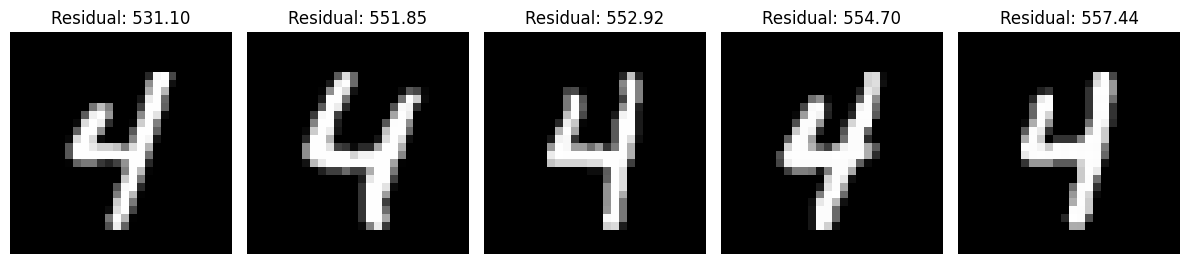

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of images to display for each label
num_images_per_label = 5

# Create a list of unique labels
unique_labels = np.unique(y)

# Create a subplot for each label
fig, axs = plt.subplots(len(unique_labels), num_images_per_label, figsize=(12, 12))

for i, label in enumerate(unique_labels):
    # Select the rows with the current label and sort by residual
    # Use nsmallest to look at smallest reconstruction errors
    top_images = residuals.query(f'label == "{label}"').nlargest(num_images_per_label, 'residual')

    for j in range(num_images_per_label):
        # Get the image index from the top_images DataFrame
        image_index = top_images.index[j]

        # Reshape and plot the image
        image = X.iloc[image_index].values.reshape(28, 28)
        axs[i, j].imshow(image, cmap='gray')
        axs[i, j].axis('off')

        # Set the title to show the residual
        residual = top_images['residual'].values[j]
        axs[i, j].set_title(f'Residual: {residual:.2f}')

# Adjust spacing between subplots for better visualization
plt.tight_layout()

# Set the title for each row
for i, label in enumerate(unique_labels):
    axs[i, 0].set_ylabel(f'Label {label}', rotation=0, labelpad=35, fontsize=12)

plt.show()
